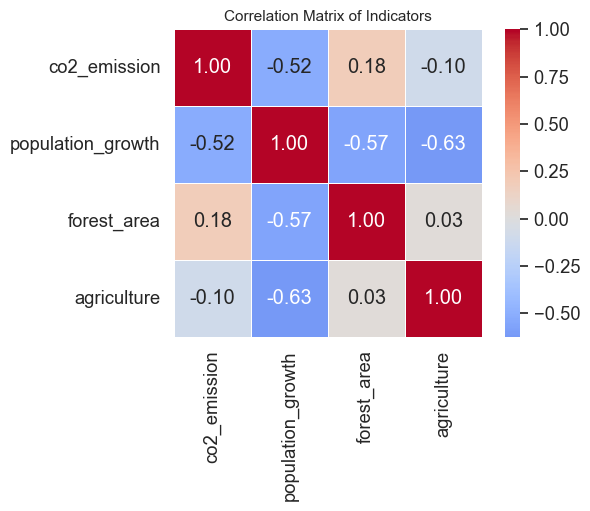

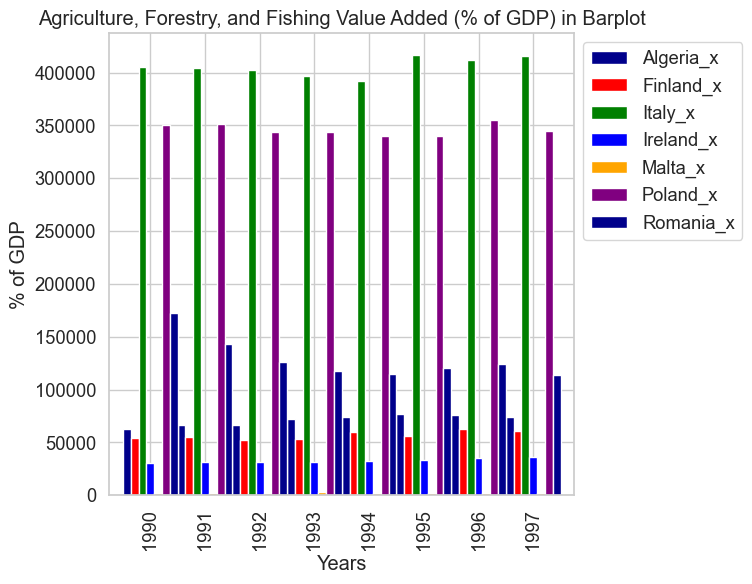

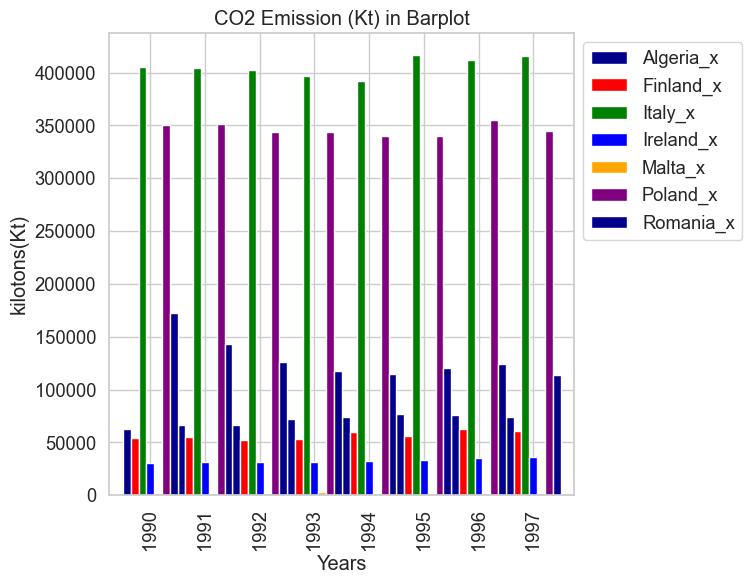

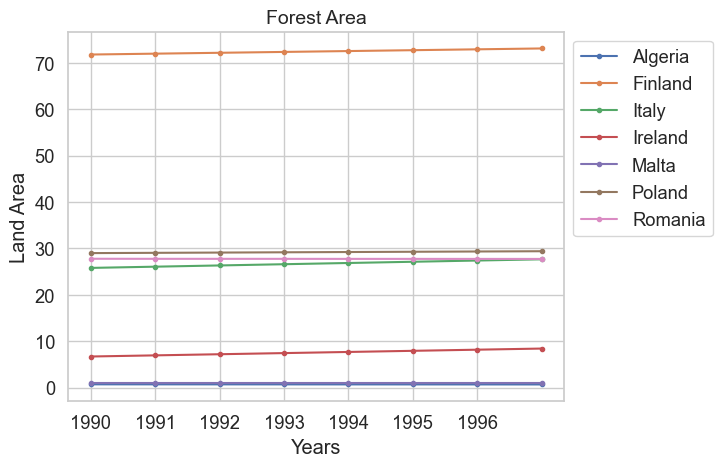

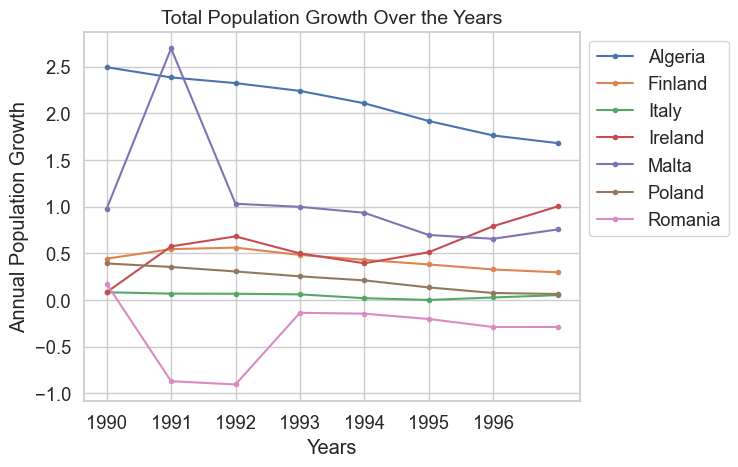

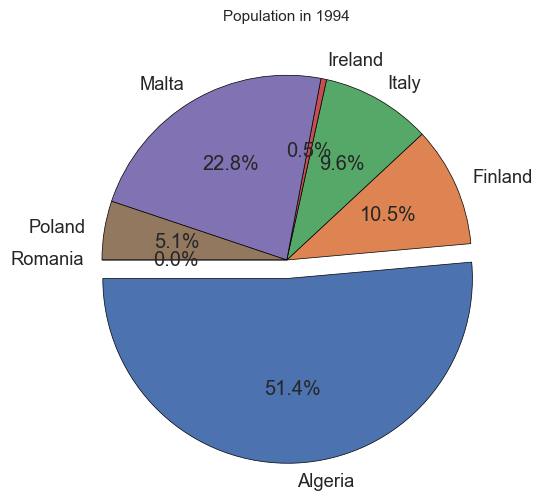

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_file(file_name):
    """
    Reads the dataset from a CSV file into a DataFrame.Yields the original and transposed DataFrames after transposing the DataFrame.
    Then transposes the dataframe and returns both the first and transposed dataframes.

    Parameters:
    - file_name (str): The name of the CSV file.

    Returns:
    - pd.DataFrame: The original DataFrame containing selected countries and years.
    - pd.DataFrame: The transposed DataFrame.
    """
    df = pd.read_csv(file_name, skiprows=4)
    countries = ["Algeria", "Finland", "Italy", "Ireland", "Malta", "Poland", "Romania"]
    process = df[df['Country Name'].isin(countries)]
    data = process.drop(['Country Code', 'Indicator Name', 'Indicator Code',
                         '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
                         '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
                         '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
                         '1987', '1988', '1989', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                         '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                         '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
                         'Unnamed: 67'], axis=1).reset_index(drop=True)

    df_t = data.transpose()
    df_t.columns = df_t.iloc[0]
    df_t = df_t.iloc[1:]
    df_t.index = pd.to_numeric(df_t.index)
    df_t['Years'] = df_t.index

    # Print or use the modified DataFrame
    return data, df_t

def slice_data(df):
    """
    Slices the DataFrame to include only specific columns ('Country Name', '1997').

    Parameters:
    - df (pd.DataFrame): The DataFrame to be sliced.

    Returns:
    - pd.DataFrame: The sliced DataFrame.
    """
    df = df[['Country Name', '1997']]
    return df

def merge_four(x1, x2, x3, x4):
    """
    Merges four DataFrames on 'Country Name' using outer join.

    Parameters:
    - x1, x2, x3, x4 (pd.DataFrame): DataFrames to be merged.

    Returns:
    - pd.DataFrame: The merged DataFrame.
    """
    merge1 = pd.merge(x1, x2, on='Country Name', how='outer')
    merge2 = pd.merge(merge1, x3, on='Country Name', how='outer')
    merge3 = pd.merge(merge2, x4, on='Country Name', how='outer')
    merge4 = merge3.reset_index(drop=True)
    return merge4

def merge_two(x, y):
    """
    Merges two DataFrames on 'Years' using outer join and filters data for specific years.

    Parameters:
    - x, y (pd.DataFrame): DataFrames to be merged.

    Returns:
    - pd.DataFrame: Merged DataFrame with specified years and a reset index.
    """
    a_b = pd.merge(x, y, on='Years', how='outer')
    a_b = a_b.reset_index(drop=True)
    a_b_years = a_b[a_b['Years'].isin([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997])]
    return a_b_years

def plot_heatmap(df):
    """
    Plots a heatmap of the correlation matrix for numeric columns in the DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns: None
    """
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.2)  # Adjust font size
    sns.heatmap(numeric_df.corr(), cmap='coolwarm', square=True, linewidths=.5, annot=True, fmt=".2f", center=0)
    plt.title("Correlation Matrix of Indicators", fontsize=11)
    plt.show()

def bar_plot(df, x_value, y_value, head_title, x_label, y_label, colors, figsize=(6, 6)):
    """
    Plots a bar plot using Seaborn.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - x_value (str): Column name for the x-axis.
    - y_value (list): List of column names for the y-axis.
    - head_title (str): Title of the plot.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    - colors (tuple): Tuple of colors for the bars.
    - figsize (tuple): Figure size for the plot.

    Returns: None
    """
    sns.set_style('whitegrid')
    df.plot(x=x_value, y=y_value, kind='bar', title=head_title, color=colors, width=1, figsize=figsize, xlabel=x_label, ylabel=y_label)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

def create_line_plot(df, y_label, title):
    """
    Plots a line chart using Seaborn.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - y_label (str): Label for the y-axis.
    - title (str): Title of the plot.

    Returns: None
    """
    sns.set_style("whitegrid")
    df.plot(x='Years', y=["Algeria", "Finland", "Italy", "Ireland", "Malta", "Poland", "Romania"], xlabel='Years', ylabel=y_label, marker='.')
    plt.title(title, fontsize=14)
    plt.xticks(range(1990, 1997, 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

def create_pie_plot(df, years, autopct='%1.1f%%', fontsize=11):
    """
    Creates and displays a pie chart representing population distribution for a specific year.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - years (str): Year for which the pie chart is created.
    - autopct (str): Format string for autopct parameter in the pie chart.
    - fontsize (int): Font size for the title.

    Returns: None
    """
    explode = (0.1, 0, 0, 0, 0, 0, 0)  # Adjust the explode values based on your preference
    label = ["Algeria", "Finland", "Italy", "Ireland", "Malta", "Poland", "Romania"]

    # Replace negative values with zeros
    df[str(years)] = df[str(years)].apply(lambda x: max(0, x))
    plt.figure(figsize=(6, 6))
    plt.pie(df[str(years)], autopct=autopct, labels=label, explode=explode,
            startangle=180, wedgeprops={"edgecolor": "black", "linewidth": 0.5, "antialiased": True})
    plt.title(f'Population in {years}', fontsize=fontsize)
    plt.show()

# Function calls
co2, co2_t = read_file('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_5994970.csv')
population, population_t = read_file('API_SP.POP.GROW_DS2_en_csv_v2_5995052.csv')
farea, farea_t = read_file('API_AG.LND.FRST.ZS_DS2_en_csv_v2_5994693.csv')
agri, agri_t = read_file('API_NV.AGR.TOTL.ZS_DS2_en_csv_v2_5995988.csv')

co2_cor = slice_data(co2).rename(columns={'1997': 'co2_emission'})
population_cor = slice_data(population).rename(columns={'1997': 'population_growth'})
farea_cor = slice_data(farea).rename(columns={'1997': 'forest_area'})
agri_cor = slice_data(agri).rename(columns={'1997': 'agriculture'})

co2_population_farea_agri = merge_four(co2_cor, population_cor, farea_cor, agri_cor)

co2_population_farea_agri.describe()

plot_heatmap(co2_population_farea_agri)

agri_co2 = merge_two(co2_t, farea_t)

bar_plot(agri_co2, 'Years', ['Algeria_x', 'Finland_x', 'Italy_x', 'Ireland_x', 'Malta_x', 'Poland_x', 'Romania_x'],
         'Agriculture, Forestry, and Fishing Value Added (% of GDP) in Barplot', 'Years', '% of GDP',
         ('darkblue', 'red', 'green', 'blue', 'orange', 'purple'))

bar_plot(agri_co2, 'Years', ['Algeria_x', 'Finland_x', 'Italy_x', 'Ireland_x', 'Malta_x', 'Poland_x', 'Romania_x'],
         'CO2 Emission (Kt) in Barplot', 'Years', 'kilotons(Kt)',
         ('darkblue', 'red', 'green', 'blue', 'orange', 'purple'))

create_line_plot(farea_t, 'Land Area', 'Forest Area')

create_line_plot(population_t, 'Annual Population Growth', 'Total Population Growth Over the Years')

def skew(df):
    """
    Calculates the skewness of each column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame for which skewness will be calculated.

    Returns:
    - pd.Series: Skewness values for each column.
    """
    return df.skew()

def kurt(df):
    """
    Calculates the kurtosis of each column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame for kurtosis calculation.

    Returns:
    - pd.Series: Kurtosis values for each column.
    """
    return df.kurt()

skewness = skew(population_t)
kurtosis = kurt(population_t)

# Displaying the results
skewness
kurtosis

# Now 'population' DataFrame is defined before using it in create_pie_plot
create_pie_plot(population, '1994')


In [6]:
population.describe()

,1990,1991,1992,1993,1994,1995,1996,1997
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.664351,0.822295,0.581529,0.628900,0.585662,0.492075,0.479315,0.509801
std,0.864385,1.273511,0.982599,0.797823,0.741895,0.699739,0.677672,0.678699
min,0.083709,-0.868694,-0.903463,-0.136109,0.000000,-0.202319,-0.288129,-0.287898
25%,0.129295,0.211955,0.187303,0.157793,0.115692,0.068655,0.052089,0.059181
50%,0.392398,0.546172,0.561910,0.483854,0.394188,0.381655,0.328038,0.297377
75%,0.710848,1.479790,0.856949,0.749298,0.683156,0.604919,0.723898,0.879804
max,2.494068,2.695093,2.323752,2.240369,2.107747,1.918044,1.763320,1.681160


In [17]:
skewness


Country Name
Algeria   -0.327508
Finland   -0.062748
Ireland   -0.220399
Italy      -0.54737
Malta      2.558641
Poland    -0.048906
Romania   -0.724113
Years           0.0
dtype: object

In [18]:
kurtosis


Country Name
Algeria   -1.468832
Finland   -1.168244
Ireland    0.856936
Italy     -0.966779
Malta      6.897933
Poland    -1.575466
Romania   -0.241621
Years          -1.2
dtype: object